In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [39]:
X = pd.read_csv('train.csv')
y = pd.read_csv('train_label.csv')

In [40]:
y.head(3)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


In [41]:
X.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [42]:
data = pd.concat([X,y['status_group']],axis=1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [44]:
Geo_columns = ['id','gps_height','longitude','latitude','basin','subvillage','region','region_code','district_code','lga','ward','status_group']

In [45]:
data_geo = data[Geo_columns]

In [46]:
data_geo.head()

,id,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,status_group
0,69572,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,functional
1,8776,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,functional
2,34310,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,functional
3,67743,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,non functional
4,19728,0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,functional


In [47]:
data_geo.describe()

,id,gps_height,longitude,latitude,region_code,district_code
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,37115.131768,668.297239,34.077427,-5.706033e+00,15.297003,5.629747
std,21453.128371,693.116350,6.567432,2.946019e+00,17.587406,9.633649
min,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000
25%,18519.750000,0.000000,33.090347,-8.540621e+00,5.000000,2.000000
50%,37061.500000,369.000000,34.908743,-5.021597e+00,12.000000,3.000000
75%,55656.500000,1319.250000,37.178387,-3.326156e+00,17.000000,5.000000
max,74247.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000


In [48]:
data_geo[data_geo['longitude']==0]['basin'].value_counts()

Lake Victoria      1713
Lake Tanganyika      99
Name: basin, dtype: int64

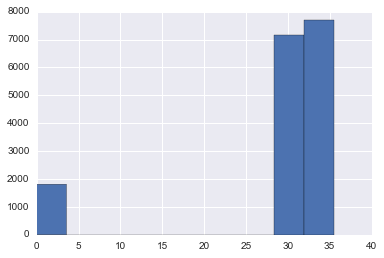

In [49]:
data_geo[(data_geo['basin'] == 'Lake Victoria') | (data_geo['basin'] == 'Lake Tanganyika')]['longitude'].hist() 

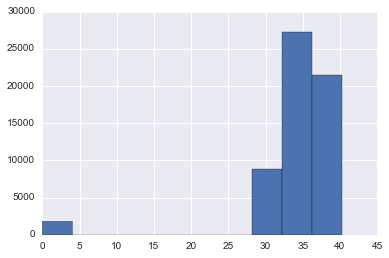

In [50]:
data_geo['longitude'].hist() 

In [51]:
longitude_fix = data_geo[((data_geo['basin'] == 'Lake Victoria') | (data_geo['basin'] == 'Lake Tanganyika')) & (data_geo['longitude']>10)]['longitude'].mean() 

In [52]:
data_geo['longitude'] = data_geo['longitude'].replace(0, longitude_fix)

C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


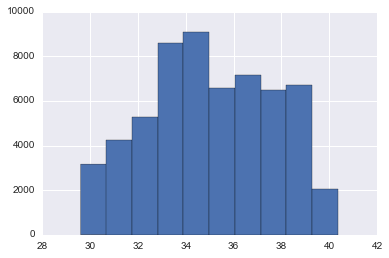

In [53]:
data_geo['longitude'].hist()

In [54]:
data_geo[data_geo['latitude']>=-0.2]['region'].value_counts()

Shinyanga    1005
Mwanza        807
Name: region, dtype: int64

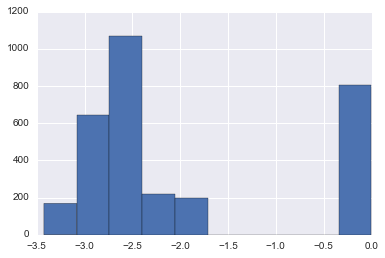

In [55]:
data_geo[(data_geo['region'] == 'Shinyana') | (data_geo['region'] == 'Mwanza')]['latitude'].hist() 

In [56]:
latitude_fix = data_geo[((data_geo['region'] == 'Shinyana') | (data_geo['region'] == 'Mwanza'))&(data_geo['latitude']<-0.2) ]['latitude'].mean() 

In [57]:
latitude_fix

-2.6205017775686295

In [58]:
wrong_lat = data_geo['latitude'][data_geo['latitude']>=-0.2].unique()

In [59]:
data_geo['latitude'] = data_geo['latitude'].replace(wrong_lat, latitude_fix)

C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
data_geo[(data_geo['region'] == 'Shinyana') | (data_geo['region'] == 'Mwanza')]['latitude'].max() 

-1.7144856500000001

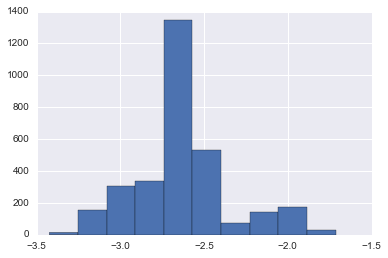

In [61]:
data_geo[(data_geo['region'] == 'Shinyana') | (data_geo['region'] == 'Mwanza')]['latitude'].hist() 

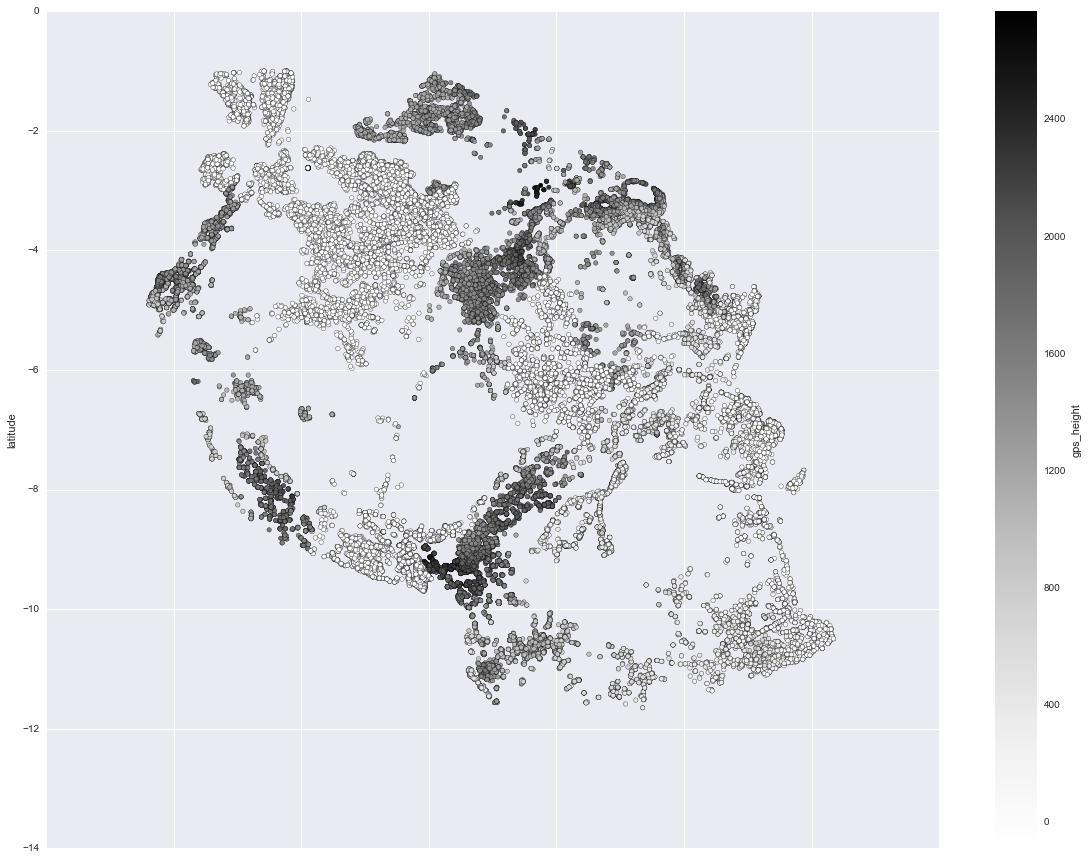

In [62]:
data_geo.plot.scatter(x='longitude', y='latitude', c='gps_height', figsize=(20,15))

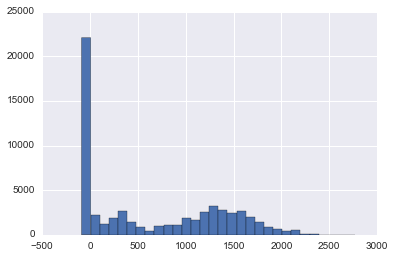

In [63]:
data_geo['gps_height'].hist(bins=30)

In [64]:
data_geo[data_geo['gps_height']==0]['lga'].value_counts()

Rungwe             1106
Mbozi              1034
Bariadi            1013
Kyela               859
Kahama              836
Magu                824
Maswa               809
Karagwe             771
Ngara               669
Kwimba              627
Mbarali             626
Shinyanga Rural     588
Nzega               575
Kondoa              523
Bukombe             514
Geita               488
Bukoba Rural        487
Mbeya Rural         485
Meatu               468
Biharamulo          403
Muleba              402
Kishapu             399
Mpwapwa             388
Urambo              382
Kongwa              361
Dodoma Urban        358
Missungwi           348
Chamwino            347
Uyui                339
Igunga              338
Sengerema           331
Chunya              298
Mkinga              288
Misenyi             260
Kilosa              244
Chato               236
Ileje               231
Bahi                224
Shinyanga Urban     191
Sikonge             170
Kilindi             161
Tabora Urban    

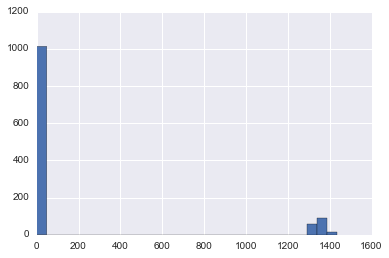

In [73]:
data_geo['gps_height'][data_geo['lga']=='Bariadi'].hist(bins=30)

In [74]:
data_geo[data_geo['gps_height'] == 0].count()

id               20438
gps_height       20438
longitude        20438
latitude         20438
basin            20438
subvillage       20077
region           20438
region_code      20438
district_code    20438
lga              20438
ward             20438
status_group     20438
dtype: int64

In [75]:
gps_h_fix = data_geo[data_geo['gps_height']<>0].groupby('lga').mean()['gps_height']

In [76]:
gps_h_fix.head(3)

lga
Arusha Rural    1429.448083
Arusha Urban    1349.174603
Babati          1401.093933
Name: gps_height, dtype: float64

In [77]:
gps_h_fix['Bariadi']

1350.9817073170732

In [69]:
lga = np.array(gps_h_fix.index)[1]

In [79]:
gps_h_fix['Bariadi']

1350.9817073170732

In [80]:
data_geo['gps_height'][data_geo['lga']=='Bariadi']

21          0
168         0
177         0
321         0
346         0
383      1362
433         0
659         0
697         0
720         0
733         0
755         0
764      1356
795      1328
798         0
839         0
911         0
939         0
960         0
971         0
992         0
1054        0
1168        0
1208        0
1240        0
1252        0
1291     1340
1333        0
1334        0
1449        0
         ... 
58045       0
58071       0
58077       0
58141    1306
58145    1375
58303    1378
58397       0
58415       0
58435       0
58464    1311
58517       0
58550       0
58607       0
58735       0
58762    1359
58771       0
58789    1302
58837       0
58969       0
59017       0
59018    1340
59033       0
59111       0
59158       0
59166       0
59189       0
59208       0
59295       0
59324       0
59374       0
Name: gps_height, dtype: int64

In [87]:
data_geo['gps_height'][data_geo['lga']=='Bariadi']=data_geo['gps_height'][data_geo['lga']=='Bariadi'].replace(to_replace=0,value=gps_h_fix['Bariadi'])

C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\generic.py:4059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

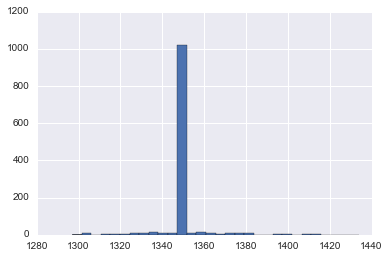

In [88]:
data_geo['gps_height'][data_geo['lga']=='Bariadi'].hist(bins=30)

In [89]:
for lga in np.array(gps_h_fix.index):
    data_geo['gps_height'][data_geo['lga']==lga]=data_geo['gps_height'][data_geo['lga']==lga].replace(to_replace=0,value=gps_h_fix[lga])

C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


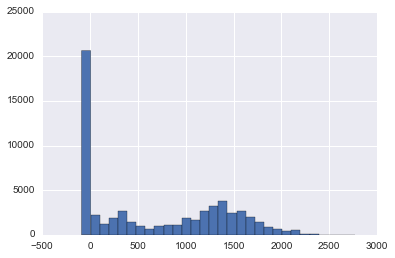

In [90]:
data_geo['gps_height'].hist(bins=30)

In [91]:
data_geo[data_geo['gps_height'] == 0].count()

id               18988
gps_height       18988
longitude        18988
latitude         18988
basin            18988
subvillage       18627
region           18988
region_code      18988
district_code    18988
lga              18988
ward             18988
status_group     18988
dtype: int64

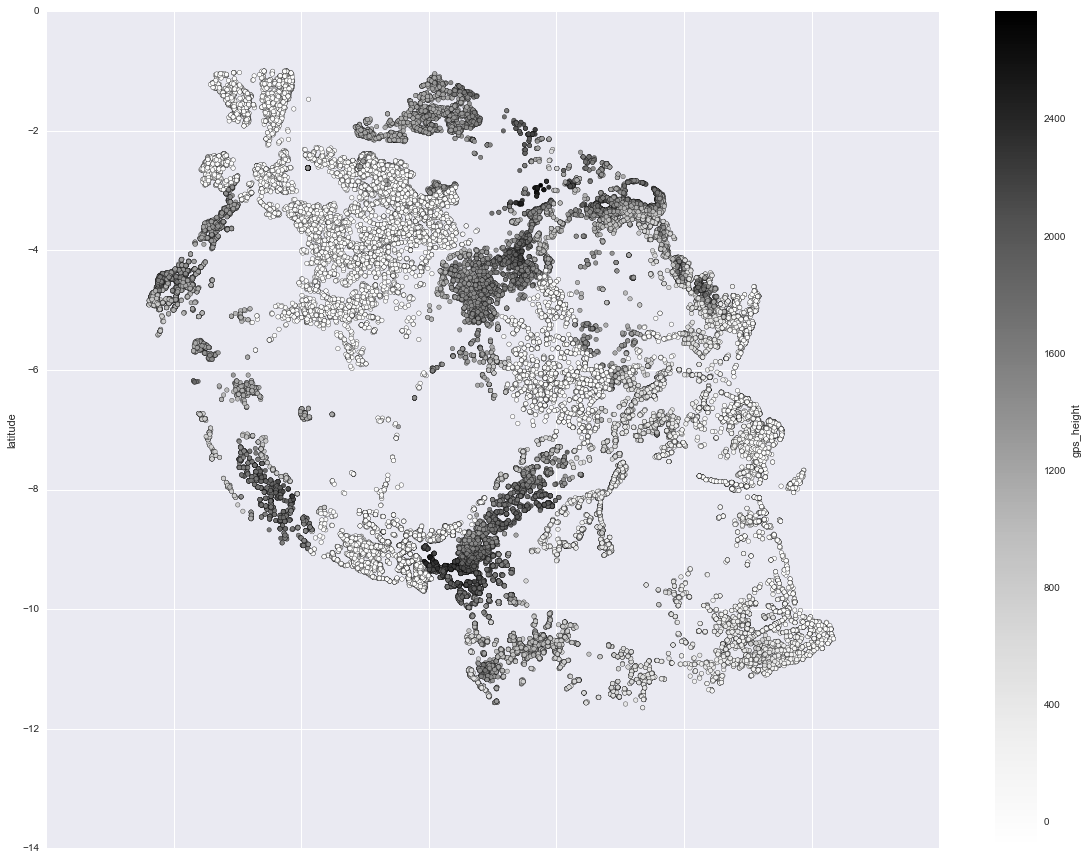

In [92]:
data_geo.plot.scatter(x='longitude', y='latitude', c='gps_height', figsize=(20,15))

In [93]:
data_geo.head(3)

,id,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,status_group
0,69572,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,functional
1,8776,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,functional
2,34310,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,functional


C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


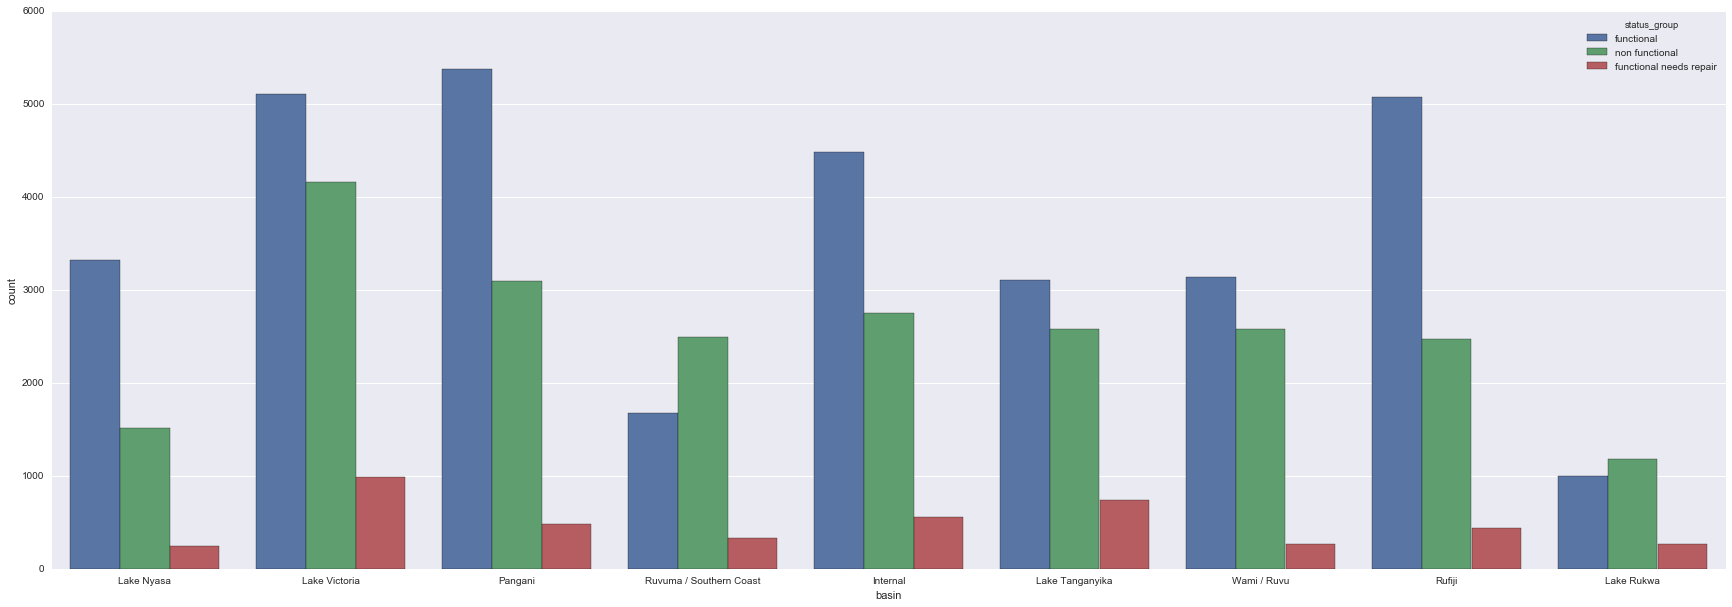

In [94]:
plt.rcParams['figure.figsize']=(30,10)
sns.countplot(x='basin',hue='status_group',data=data_geo)

In [95]:
Temp = data_geo.groupby(['basin', 'status_group']).count()

In [96]:
Temp.head()

id  gps_height  longitude  latitude  \
basin      status_group                                                     
Internal   functional               4482        4482       4482      4482   
           functional needs repair   557         557        557       557   
           non functional           2746        2746       2746      2746   
Lake Nyasa functional               3324        3324       3324      3324   
           functional needs repair   250         250        250       250   

                                    subvillage  region  region_code  \
basin      status_group                                               
Internal   functional                     4482    4482         4482   
           functional needs repair         557     557          557   
           non functional                 2746    2746         2746   
Lake Nyasa functional                     3324    3324         3324   
           functional needs repair         250     250          250   

                                    district_code   lga  ward  
basin      status_group                                        
Internal   functional                        4482  4482  4482  
           functional needs repair            557   557   557  
           non functional                    2746  2746  2746  
Lake Nyasa functional                        3324  3324  3324  
           functional needs repair            250   250   250

In [97]:
Temp.unstack()['id']

status_group,functional,functional needs repair,non functional
basin,,,
Internal,4482,557,2746
Lake Nyasa,3324,250,1511
Lake Rukwa,1000,270,1184
Lake Tanganyika,3107,742,2583
Lake Victoria,5100,989,4159
Pangani,5372,477,3091
Rufiji,5068,437,2471
Ruvuma / Southern Coast,1670,326,2497
Wami / Ruvu,3136,269,2582


In [98]:
Temp.unstack()['id'].sum(axis=0)

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

In [99]:
Temp = Temp.unstack()['id'] / Temp.unstack()['id'].sum(axis=0)

In [100]:
Temp

status_group,functional,functional needs repair,non functional
basin,,,
Internal,0.138938,0.129025,0.120312
Lake Nyasa,0.103041,0.057911,0.066202
Lake Rukwa,0.030999,0.062543,0.051875
Lake Tanganyika,0.096314,0.171879,0.113170
Lake Victoria,0.158095,0.229094,0.182220
Pangani,0.166527,0.110493,0.135428
Rufiji,0.157103,0.101228,0.108263
Ruvuma / Southern Coast,0.051768,0.075515,0.109402
Wami / Ruvu,0.097213,0.062312,0.113127


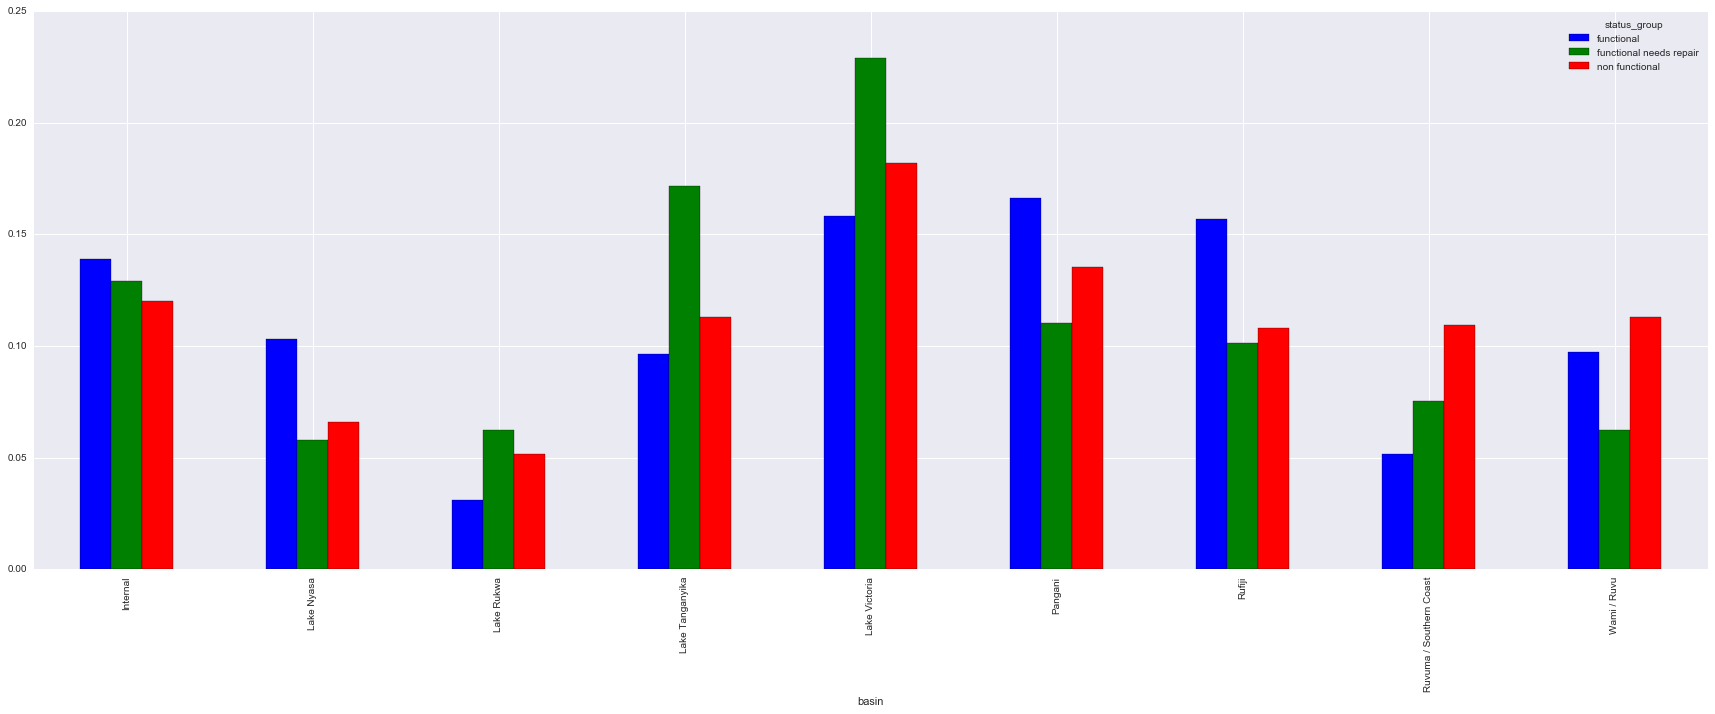

In [101]:
Temp.plot.bar()

In [102]:
data_geo.head(3)

,id,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,status_group
0,69572,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,functional
1,8776,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,functional
2,34310,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,functional


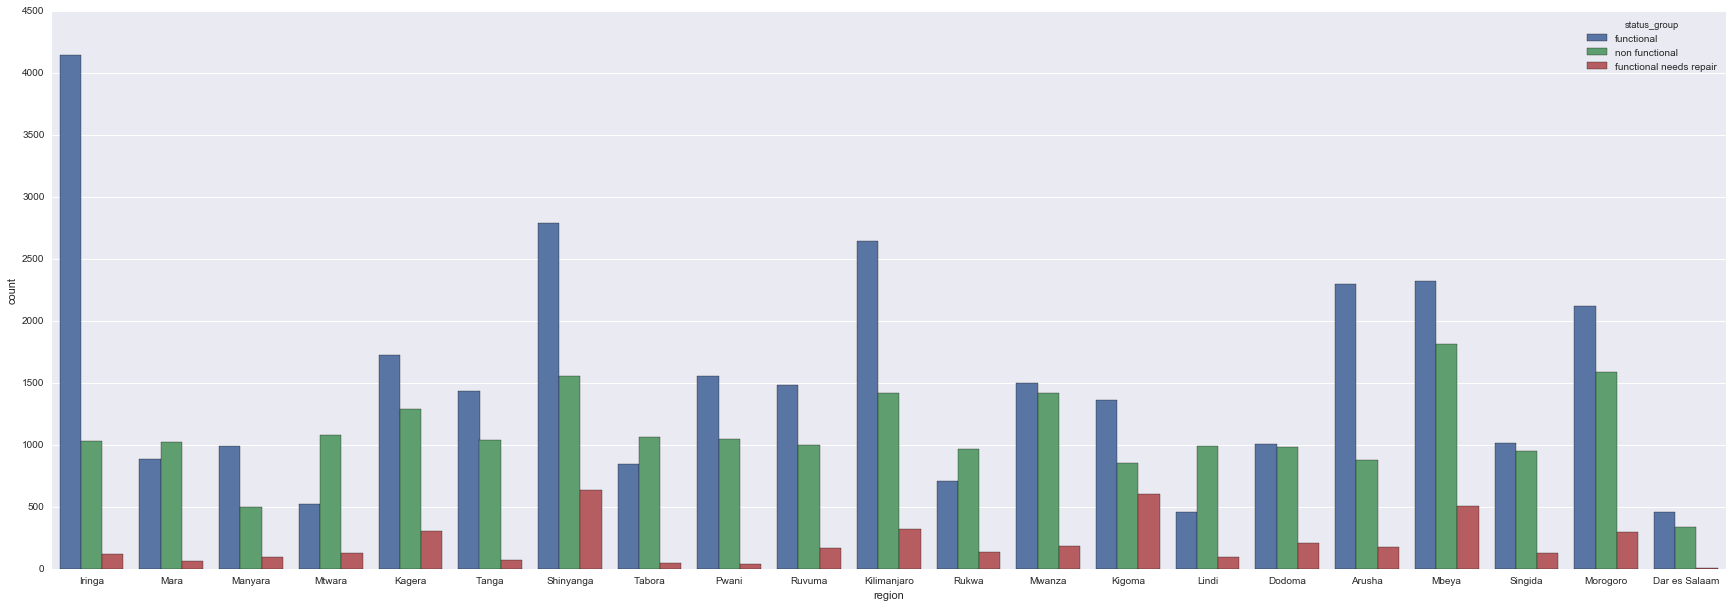

In [103]:
plt.rcParams['figure.figsize']=(30,10)
sns.countplot(x='region',hue='status_group',data=data_geo)

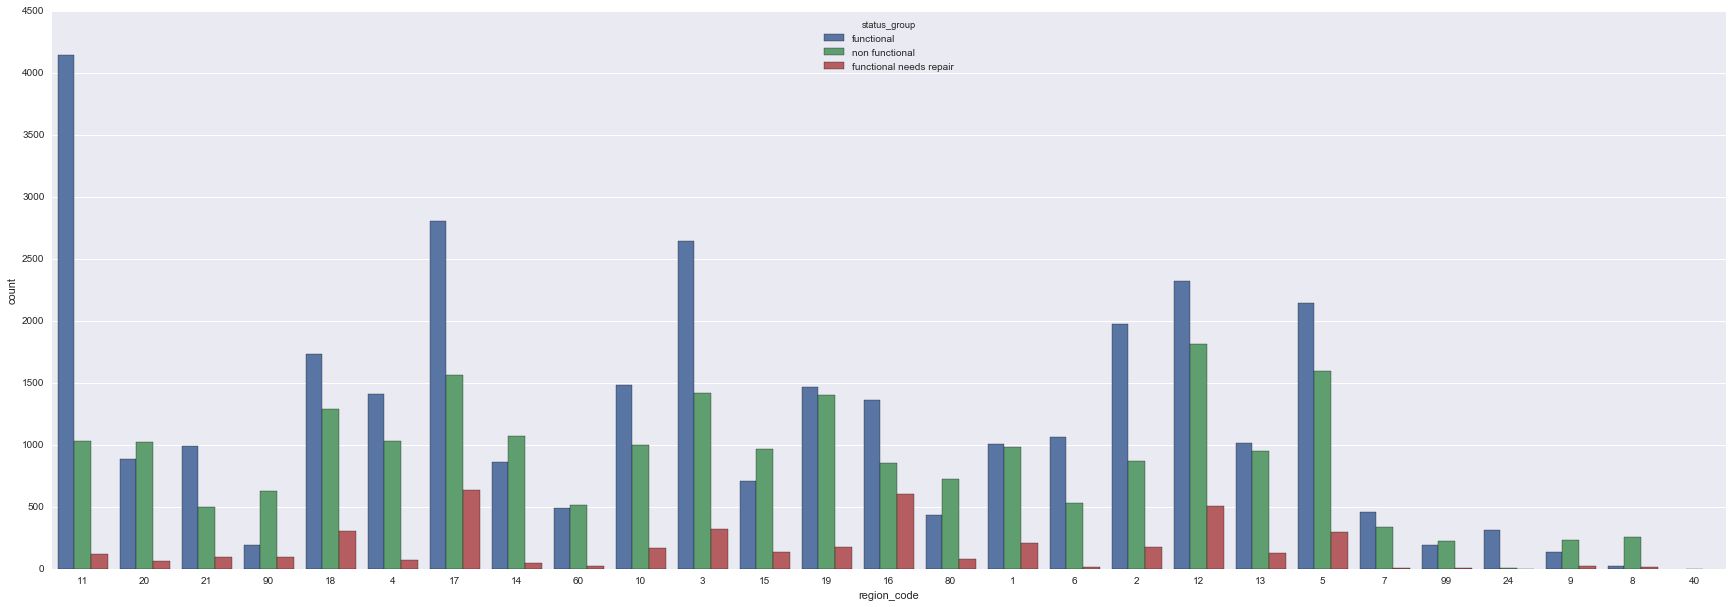

In [104]:
plt.rcParams['figure.figsize']=(30,10)
sns.countplot(x='region_code',hue='status_group',data=data_geo)

In [105]:
data_geo.head(3)

,id,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,status_group
0,69572,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,functional
1,8776,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,functional
2,34310,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,functional


In [106]:
data_geo.count()

id               59400
gps_height       59400
longitude        59400
latitude         59400
basin            59400
subvillage       59029
region           59400
region_code      59400
district_code    59400
lga              59400
ward             59400
status_group     59400
dtype: int64

In [107]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [108]:
data.drop(labels=['basin','subvillage','region','region_code','district_code','lga','ward'],axis=1, inplace=True)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 34 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object
scheme_management        55523 non-null object
scheme_name              31234 non-null object
permit                   56344 non-null object
construction_year        59400 non-null int64
extraction_type          59400 non-null object
extraction_type_group    59400 non-null object


In [110]:
data.drop(labels=['wpt_name'],axis=1, inplace=True)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 33 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
num_private              59400 non-null int64
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object
scheme_management        55523 non-null object
scheme_name              31234 non-null object
permit                   56344 non-null object
construction_year        59400 non-null int64
extraction_type          59400 non-null object
extraction_type_group    59400 non-null object
extraction_type_class    59400 non-null object


In [112]:
Source_qual_columns = ['source','source_type','source_class','quality_group','water_quality','status_group']

In [113]:
data_sq = data[Source_qual_columns]

In [114]:
data_sq.head()

,source,source_type,source_class,quality_group,water_quality,status_group
0,spring,spring,groundwater,good,soft,functional
1,rainwater harvesting,rainwater harvesting,surface,good,soft,functional
2,dam,dam,surface,good,soft,functional
3,machine dbh,borehole,groundwater,good,soft,non functional
4,rainwater harvesting,rainwater harvesting,surface,good,soft,functional


In [115]:
data_sq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 6 columns):
source           59400 non-null object
source_type      59400 non-null object
source_class     59400 non-null object
quality_group    59400 non-null object
water_quality    59400 non-null object
status_group     59400 non-null object
dtypes: object(6)
memory usage: 3.2+ MB


In [116]:
data['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [117]:
data['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [118]:
data['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

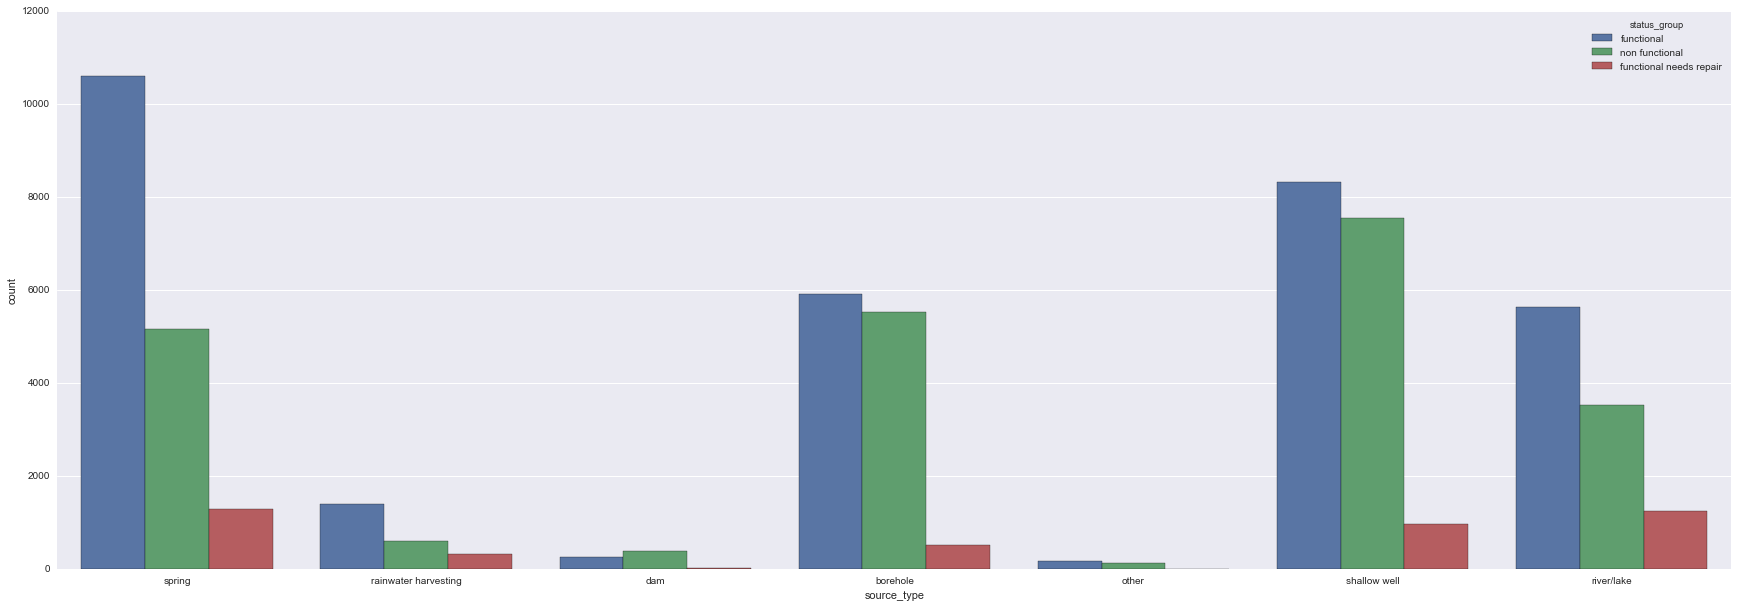

In [119]:
sns.countplot(x='source_type',hue='status_group',data=data_sq)

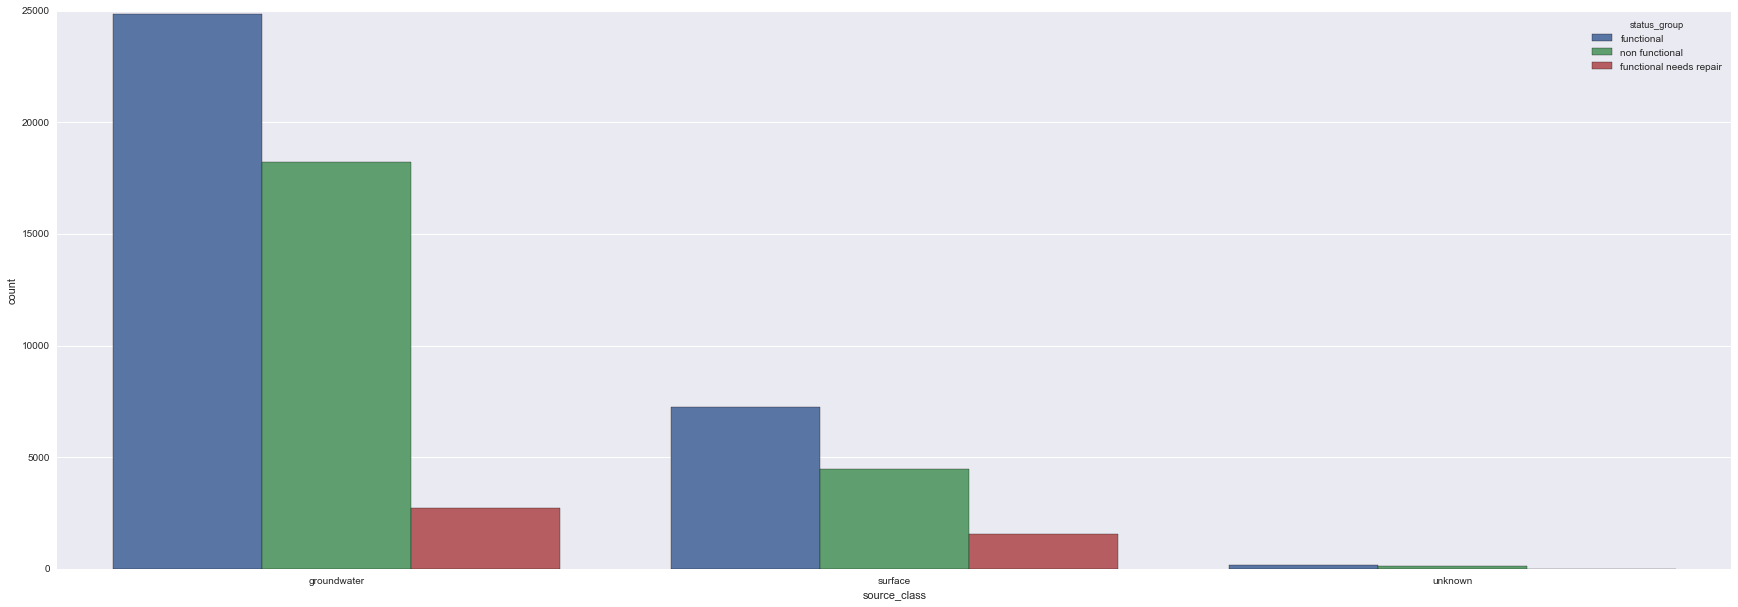

In [120]:
sns.countplot(x='source_class',hue='status_group',data=data_sq)

In [121]:
data.drop(labels=['source','source_class'],axis=1, inplace=True)

In [122]:
data_sq.drop(labels=['source','source_class'],axis=1, inplace=True)

C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [123]:
data_sq.head()

,source_type,quality_group,water_quality,status_group
0,spring,good,soft,functional
1,rainwater harvesting,good,soft,functional
2,dam,good,soft,functional
3,borehole,good,soft,non functional
4,rainwater harvesting,good,soft,functional


In [197]:
data_sq['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [198]:
data_sq['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

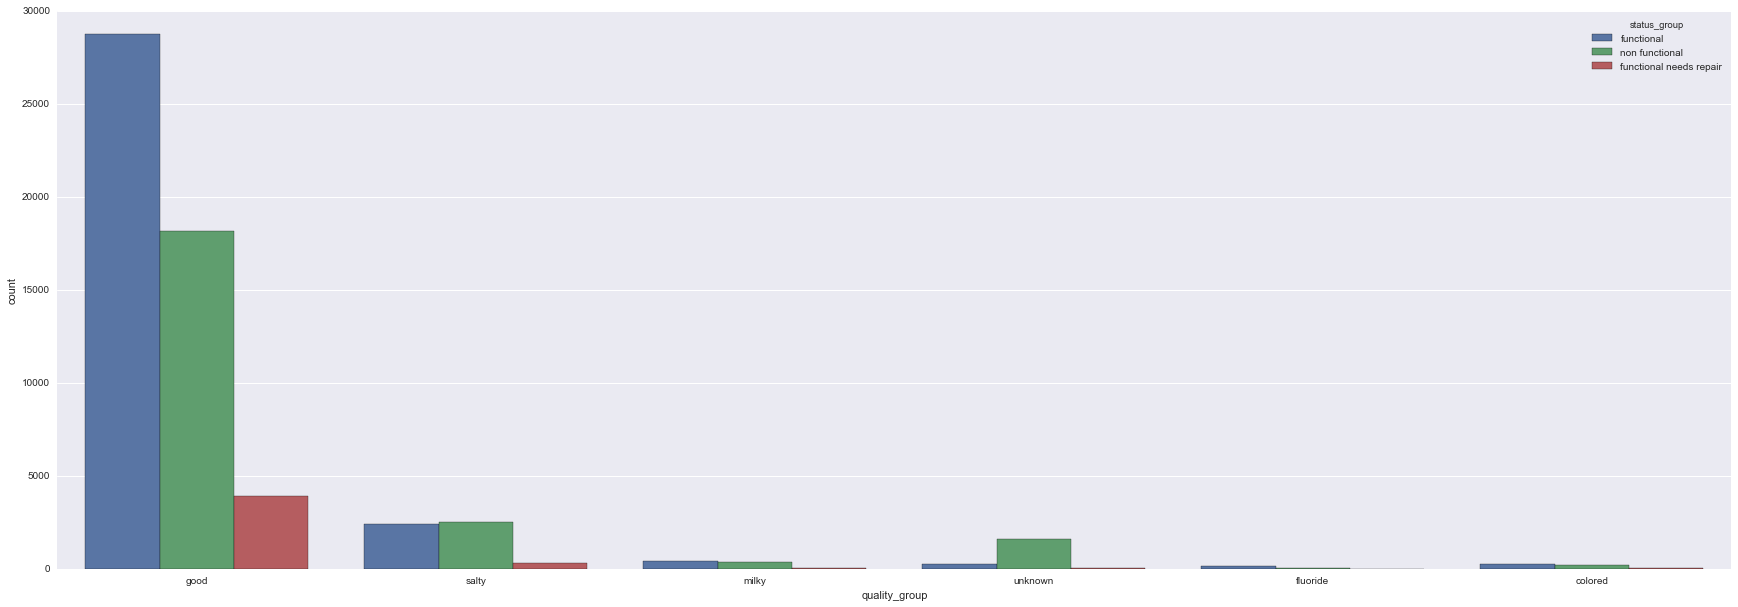

In [125]:
sns.countplot(x='quality_group',hue='status_group',data=data_sq)

In [126]:
data.drop(labels=['water_quality'],axis=1, inplace=True)
data_sq.drop(labels=['water_quality'],axis=1, inplace=True)

C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [127]:
data_sq.head()

,source_type,quality_group,status_group
0,spring,good,functional
1,rainwater harvesting,good,functional
2,dam,good,functional
3,borehole,good,non functional
4,rainwater harvesting,good,functional


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 30 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
num_private              59400 non-null int64
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object
scheme_management        55523 non-null object
scheme_name              31234 non-null object
permit                   56344 non-null object
construction_year        59400 non-null int64
extraction_type          59400 non-null object
extraction_type_group    59400 non-null object
extraction_type_class    59400 non-null object


In [129]:
data.drop(labels=['num_private','date_recorded','recorded_by'], axis=1, inplace=True)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 27 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
population               59400 non-null int64
public_meeting           56066 non-null object
scheme_management        55523 non-null object
scheme_name              31234 non-null object
permit                   56344 non-null object
construction_year        59400 non-null int64
extraction_type          59400 non-null object
extraction_type_group    59400 non-null object
extraction_type_class    59400 non-null object
management               59400 non-null object
management_group         59400 non-null object
payment                  59400 non-null object

In [131]:
funder_installer = ['id','funder','installer','construction_year','status_group']

In [132]:
data_fund_instal = data[funder_installer]

In [133]:
data_fund_instal.head()

,id,funder,installer,construction_year,status_group
0,69572,Roman,Roman,1999,functional
1,8776,Grumeti,GRUMETI,2010,functional
2,34310,Lottery Club,World vision,2009,functional
3,67743,Unicef,UNICEF,1986,non functional
4,19728,Action In A,Artisan,0,functional


In [134]:
data_fund_instal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 5 columns):
id                   59400 non-null int64
funder               55765 non-null object
installer            55745 non-null object
construction_year    59400 non-null int64
status_group         59400 non-null object
dtypes: int64(2), object(3)
memory usage: 2.7+ MB


In [152]:
data_fund_instal['funder'].value_counts()

Government Of Tanzania         9084
Danida                         3114
Hesawa                         2202
Rwssp                          1374
World Bank                     1349
Kkkt                           1287
World Vision                   1246
Unicef                         1057
Tasaf                           877
District Council                843
Dhv                             829
Private Individual              826
Dwsp                            811
0                               777
Norad                           765
Germany Republi                 610
Tcrs                            602
Ministry Of Water               590
Water                           583
Dwe                             484
Netherlands                     470
Hifab                           450
Adb                             448
Lga                             442
Amref                           425
Fini Water                      393
Oxfam                           359
Wateraid                    

In [139]:
data_fund_instal['installer'].value_counts()

DWE                          17402
Government                    1825
RWE                           1206
Commu                         1060
DANIDA                        1050
KKKT                           898
Hesawa                         840
0                              777
TCRS                           707
Central government             622
CES                            610
Community                      553
DANID                          552
District Council               551
HESAWA                         539
World vision                   408
LGA                            408
WEDECO                         397
TASAF                          396
District council               392
Gover                          383
AMREF                          329
TWESA                          316
WU                             301
Dmdd                           287
ACRA                           278
World Vision                   270
SEMA                           249
DW                  

In [141]:
(data_fund_instal['installer'] == data_fund_instal['funder']).sum()

5696

In [149]:
data_fund_instal['funder'].nunique()

1897

In [150]:
data_fund_instal['installer'].nunique()

2145

In [155]:
data_instal = data_fund_instal[['id','installer','construction_year','status_group']]

In [156]:
data_instal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 4 columns):
id                   59400 non-null int64
installer            55745 non-null object
construction_year    59400 non-null int64
status_group         59400 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [167]:
data_instal.groupby(['construction_year','installer']).count().unstack()['id']

installer,-,0,A.D.B,AAR,ABASIA,ABD,ABDALA,ABDUL,AC,ACORD,...,villigers,wanan,wananchi,wananchi technicians,wasab,water board,wizara ya maji,world,world banks,world vision
construction_year,,,,,,,,,,,,,,,,,,,,,
0,3,14,1,4,NaN,1,1,NaN,NaN,3,...,NaN,NaN,53,NaN,NaN,NaN,NaN,4,NaN,1
1960,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


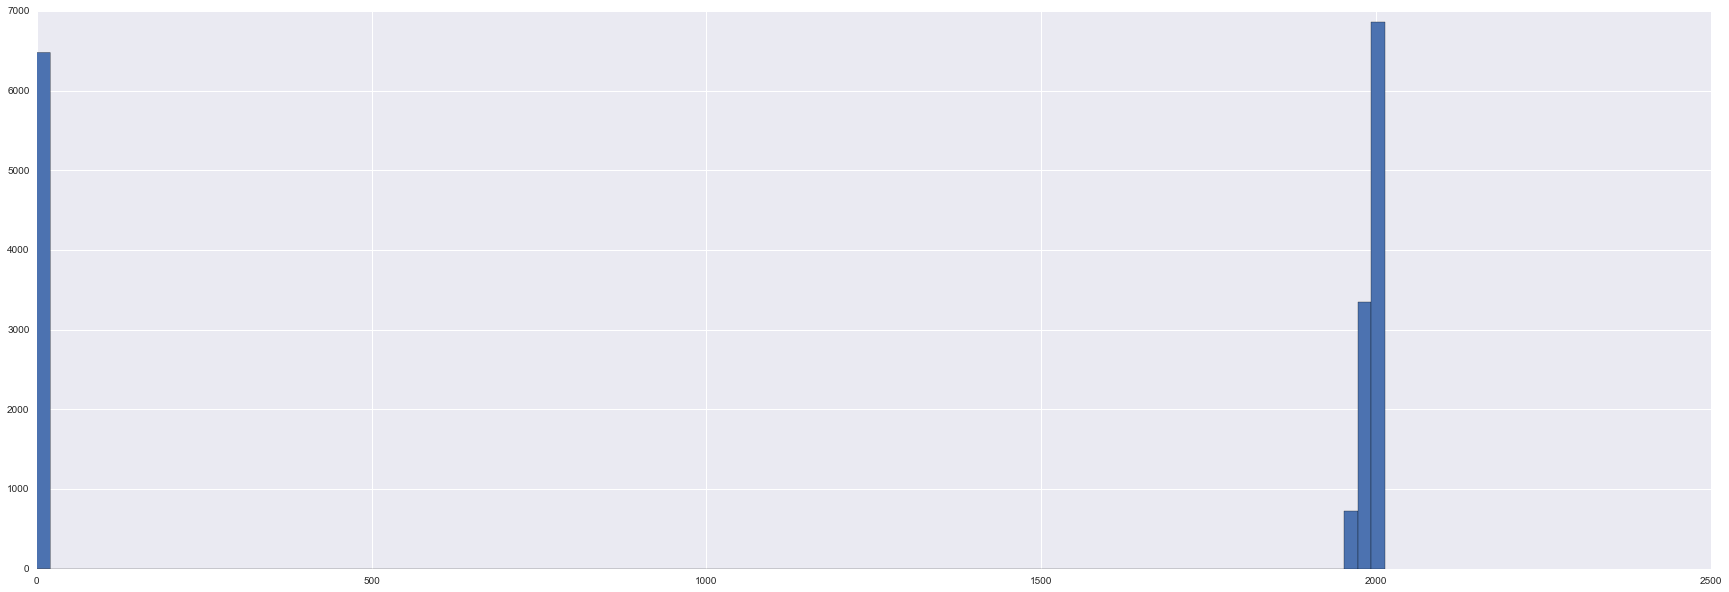

In [170]:
data_instal[data_instal['installer']=='DWE']['construction_year'].hist(bins=100)

In [173]:
year_fix = data_instal[data_instal['construction_year']>100].groupby('installer').median()['construction_year']

In [174]:
year_fix.head()

installer
0         2000
ABASIA    1985
ABDUL     2011
AC        2009
ACRA      2009
Name: construction_year, dtype: float64

In [183]:
year_fix['DWE']

1997.0

In [190]:
data_instal.loc[data_instal['installer']=='DWE','construction_year'] = data_instal[data_instal['installer']=='DWE']['construction_year'].replace(to_replace=0,value=year_fix['DWE'])

C:\Users\nslimi\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


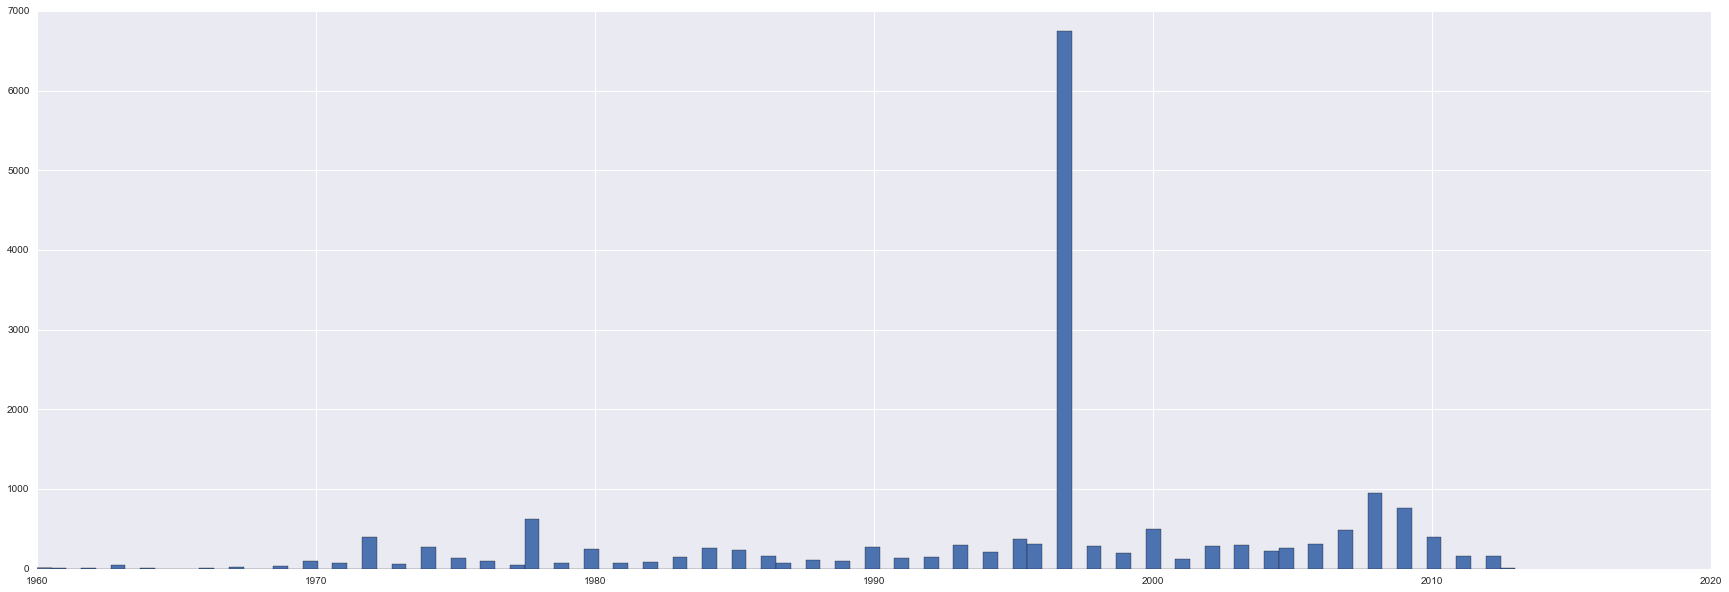

In [191]:
data_instal[data_instal['installer']=='DWE']['construction_year'].hist(bins=100)

In [192]:
for installer in np.array(year_fix.index):
    data_instal.loc[data_instal['installer']==installer,'construction_year'] = data_instal[data_instal['installer']==installer]['construction_year'].replace(to_replace=0,value=year_fix[installer])

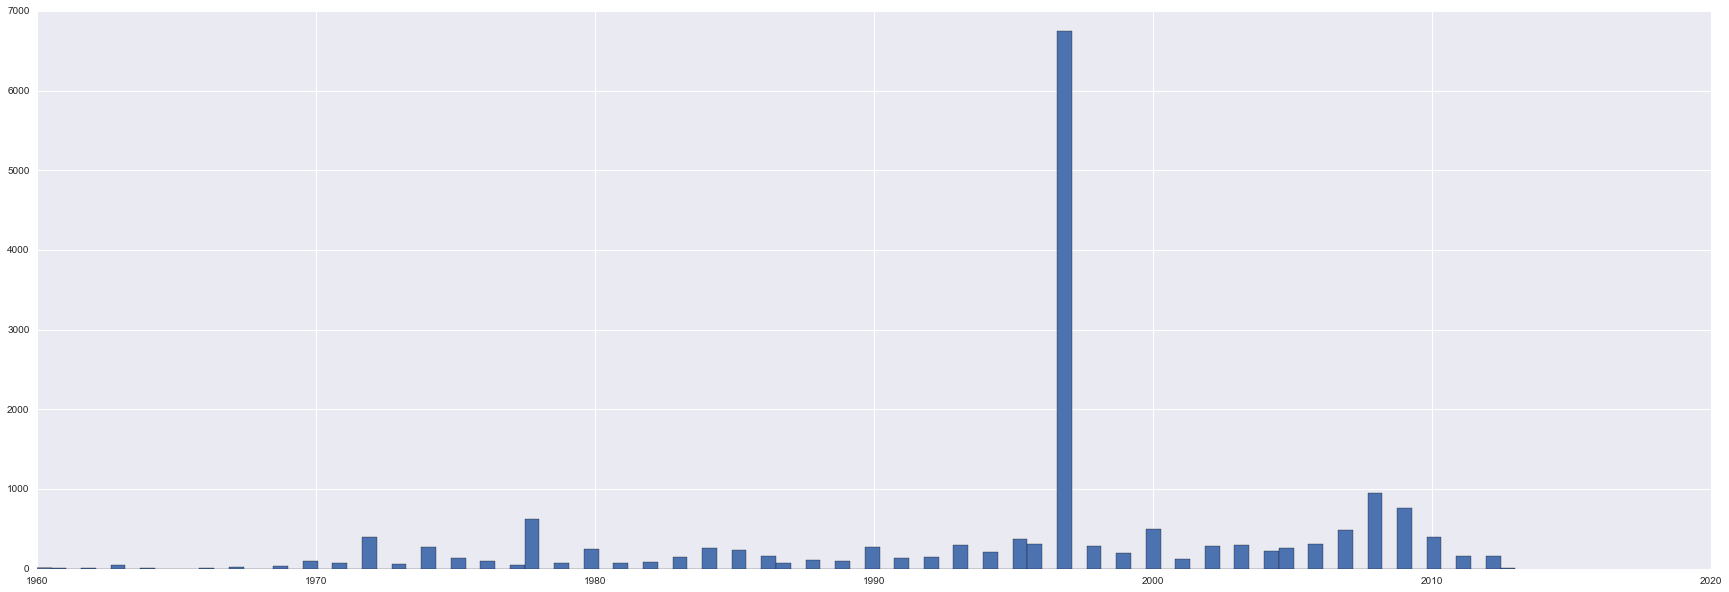

In [193]:
data_instal[data_instal['installer']=='DWE']['construction_year'].hist(bins=100)

In [194]:
data.drop(labels=['installer','funder'], axis=1, inplace=True)
data['construction_year'] = data_instal['construction_year']

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
gps_height               59400 non-null int64
longitude                59400 non-null float64
latitude                 59400 non-null float64
population               59400 non-null int64
public_meeting           56066 non-null object
scheme_management        55523 non-null object
scheme_name              31234 non-null object
permit                   56344 non-null object
construction_year        59400 non-null float64
extraction_type          59400 non-null object
extraction_type_group    59400 non-null object
extraction_type_class    59400 non-null object
management               59400 non-null object
management_group         59400 non-null object
payment                  59400 non-null object
payment_type             59400 non-null object
quality_group            59400 non-null obje

In [197]:
data_quant = data[['id','quantity_group','quantity','amount_tsh','status_group']]

In [198]:
data_quant.head()

,id,quantity_group,quantity,amount_tsh,status_group
0,69572,enough,enough,6000,functional
1,8776,insufficient,insufficient,0,functional
2,34310,enough,enough,25,functional
3,67743,dry,dry,0,non functional
4,19728,seasonal,seasonal,0,functional


In [200]:
(data_quant['quantity'] == data_quant['quantity_group']).sum()

59400

In [201]:
data.drop(labels=['quantity_group'], axis=1, inplace=True)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 24 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
gps_height               59400 non-null int64
longitude                59400 non-null float64
latitude                 59400 non-null float64
population               59400 non-null int64
public_meeting           56066 non-null object
scheme_management        55523 non-null object
scheme_name              31234 non-null object
permit                   56344 non-null object
construction_year        59400 non-null float64
extraction_type          59400 non-null object
extraction_type_group    59400 non-null object
extraction_type_class    59400 non-null object
management               59400 non-null object
management_group         59400 non-null object
payment                  59400 non-null object
payment_type             59400 non-null object
quality_group            59400 non-null obje

In [205]:
data.drop(labels=['permit','public_meeting','scheme_management','scheme_name'], axis=1, inplace=True)

In [215]:
data_extract = data[['id','extraction_type','extraction_type_group','extraction_type_class','status_group']]

In [216]:
data_extract.head()

,id,extraction_type,extraction_type_group,extraction_type_class,status_group
0,69572,gravity,gravity,gravity,functional
1,8776,gravity,gravity,gravity,functional
2,34310,gravity,gravity,gravity,functional
3,67743,submersible,submersible,submersible,non functional
4,19728,gravity,gravity,gravity,functional


In [217]:
data_extract['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [218]:
data_extract['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

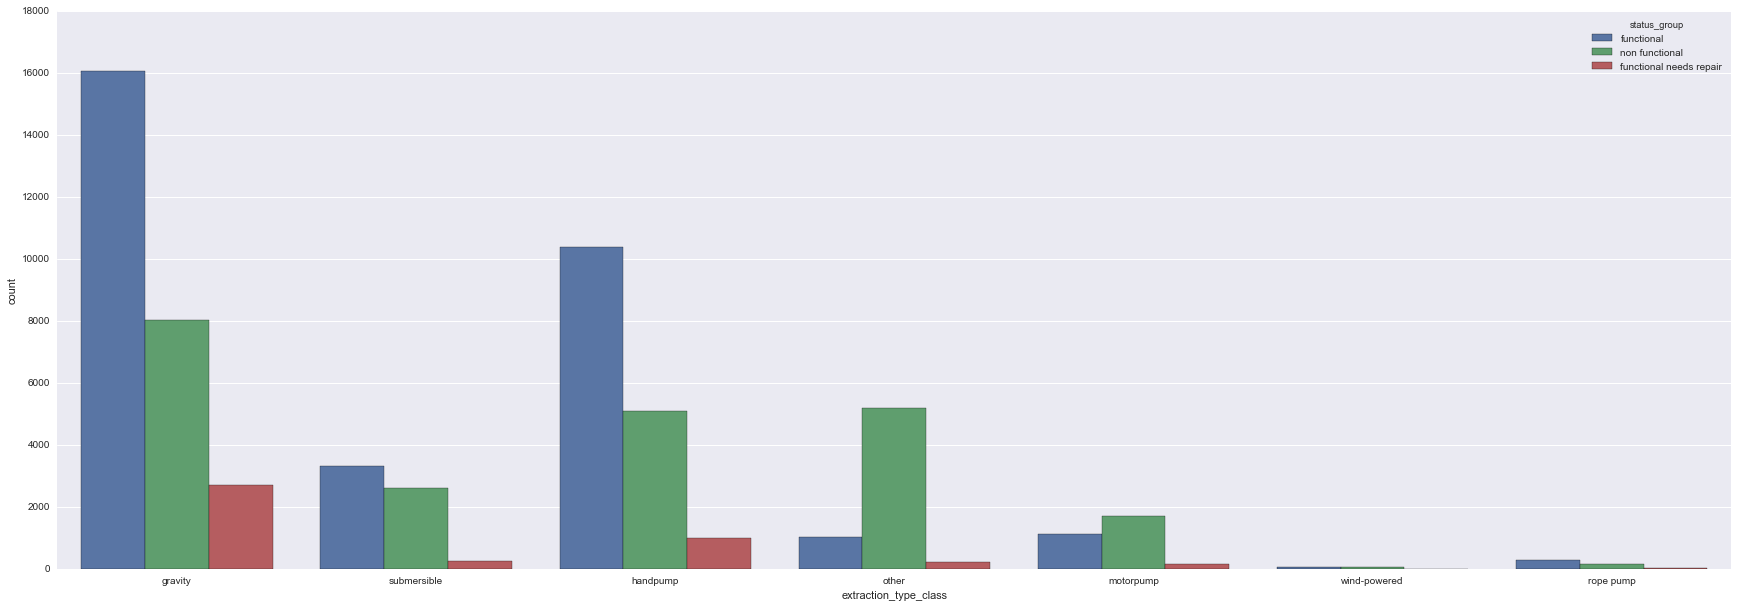

In [220]:
sns.countplot(x='extraction_type_class', hue='status_group',data=data_extract)

In [221]:
data.drop(labels=['extraction_type','extraction_type_group'], axis=1, inplace=True)

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 18 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
gps_height               59400 non-null int64
longitude                59400 non-null float64
latitude                 59400 non-null float64
population               59400 non-null int64
construction_year        59400 non-null float64
extraction_type_class    59400 non-null object
management               59400 non-null object
management_group         59400 non-null object
payment                  59400 non-null object
payment_type             59400 non-null object
quality_group            59400 non-null object
quantity                 59400 non-null object
source_type              59400 non-null object
waterpoint_type          59400 non-null object
waterpoint_type_group    59400 non-null object
status_group             59400 non-null object
dtypes: float64(4), int64(3), object(11)
mem

In [223]:
data_mgt = data[['id','management','management_group','status_group']]

In [224]:
data_mgt.head()

,id,management,management_group,status_group
0,69572,vwc,user-group,functional
1,8776,wug,user-group,functional
2,34310,vwc,user-group,functional
3,67743,vwc,user-group,non functional
4,19728,other,other,functional


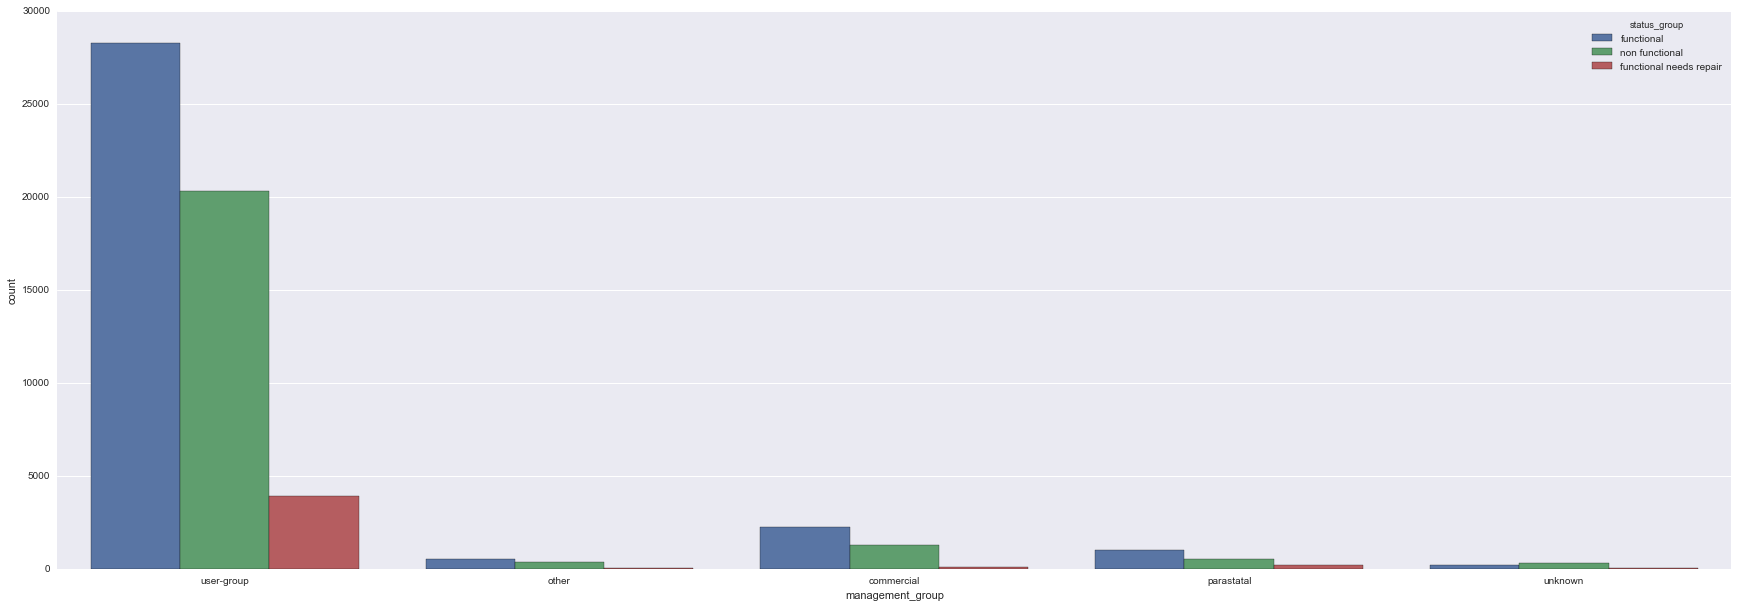

In [226]:
sns.countplot(x='management_group', hue='status_group',data=data_mgt)

In [227]:
data.drop(labels=['management'], axis=1, inplace=True)

In [230]:
data['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [231]:
data['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [232]:
data.drop(labels=['payment_type'], axis=1, inplace=True)

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 16 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
gps_height               59400 non-null int64
longitude                59400 non-null float64
latitude                 59400 non-null float64
population               59400 non-null int64
construction_year        59400 non-null float64
extraction_type_class    59400 non-null object
management_group         59400 non-null object
payment                  59400 non-null object
quality_group            59400 non-null object
quantity                 59400 non-null object
source_type              59400 non-null object
waterpoint_type          59400 non-null object
waterpoint_type_group    59400 non-null object
status_group             59400 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 7.7+ MB


In [237]:
data[['id','source_type','waterpoint_type','waterpoint_type_group','status_group']].head()

,id,source_type,waterpoint_type,waterpoint_type_group,status_group
0,69572,spring,communal standpipe,communal standpipe,functional
1,8776,rainwater harvesting,communal standpipe,communal standpipe,functional
2,34310,dam,communal standpipe multiple,communal standpipe,functional
3,67743,borehole,communal standpipe multiple,communal standpipe,non functional
4,19728,rainwater harvesting,communal standpipe,communal standpipe,functional


In [238]:
data['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [239]:
data['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [247]:
data_cumm = data[(data['waterpoint_type'] == 'communal standpipe') | (data['waterpoint_type'] == 'communal standpipe multiple')]

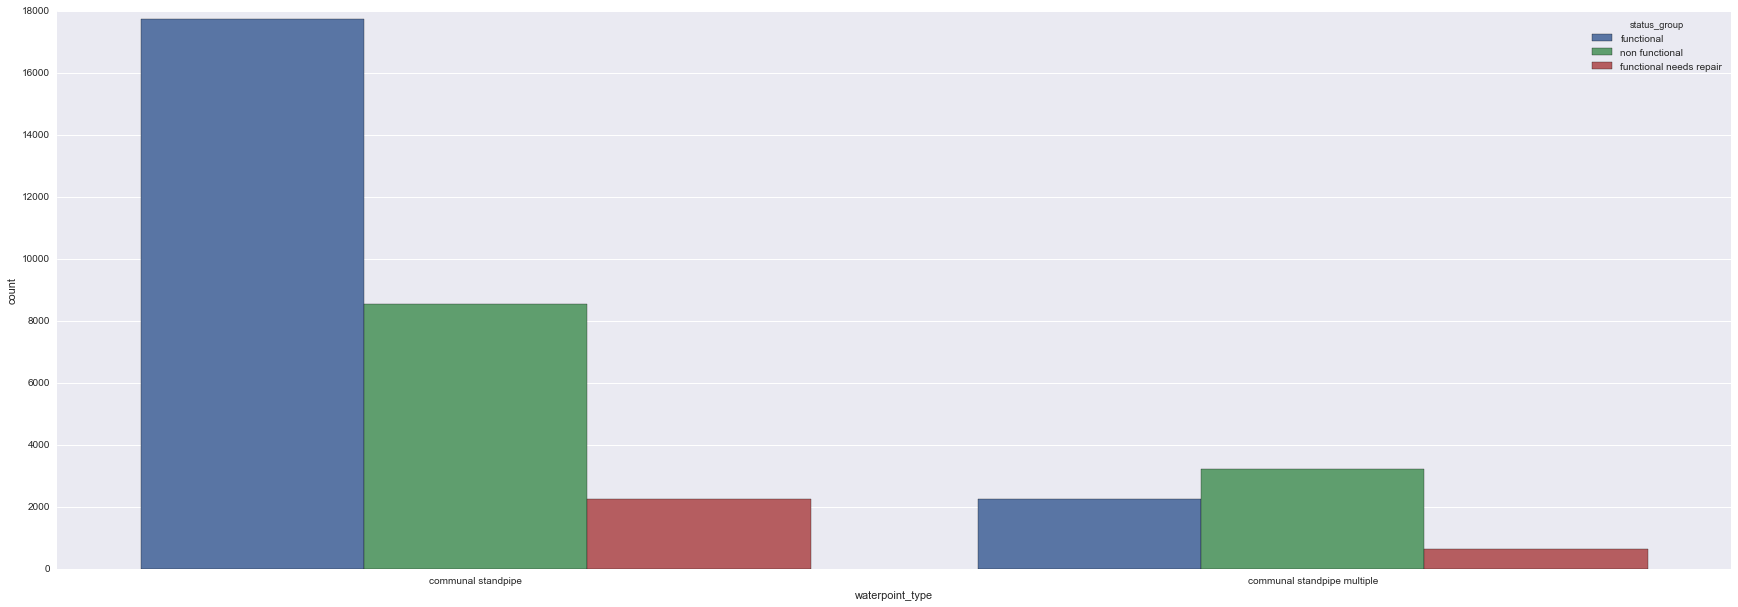

In [249]:
sns.countplot(x='waterpoint_type', hue='status_group', data=data_cumm)

In [250]:
data.drop(labels=['waterpoint_type_group'], axis=1, inplace=True)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 15 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
gps_height               59400 non-null int64
longitude                59400 non-null float64
latitude                 59400 non-null float64
population               59400 non-null int64
construction_year        59400 non-null float64
extraction_type_class    59400 non-null object
management_group         59400 non-null object
payment                  59400 non-null object
quality_group            59400 non-null object
quantity                 59400 non-null object
source_type              59400 non-null object
waterpoint_type          59400 non-null object
status_group             59400 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 7.3+ MB


In [255]:
features = data.columns

In [262]:
data.head()

,id,amount_tsh,gps_height,longitude,latitude,population,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source_type,waterpoint_type,status_group
0,69572,6000,1390,34.938093,-9.856322,109,1999,gravity,user-group,pay annually,good,enough,spring,communal standpipe,functional
1,8776,0,1399,34.698766,-2.147466,280,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25,686,37.460664,-3.821329,250,2009,gravity,user-group,pay per bucket,good,enough,dam,communal standpipe multiple,functional
3,67743,0,263,38.486161,-11.155298,58,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe multiple,non functional
4,19728,0,0,31.130847,-1.825359,0,2009,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional


In [263]:
labels = {label:idx for idx,label in enumerate(np.unique(data['status_group']))}

In [264]:
labels

{'functional': 0, 'functional needs repair': 1, 'non functional': 2}

In [266]:
data['status_group'] = data['status_group'].map(labels)

In [267]:
data.head()

,id,amount_tsh,gps_height,longitude,latitude,population,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source_type,waterpoint_type,status_group
0,69572,6000,1390,34.938093,-9.856322,109,1999,gravity,user-group,pay annually,good,enough,spring,communal standpipe,0
1,8776,0,1399,34.698766,-2.147466,280,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,0
2,34310,25,686,37.460664,-3.821329,250,2009,gravity,user-group,pay per bucket,good,enough,dam,communal standpipe multiple,0
3,67743,0,263,38.486161,-11.155298,58,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe multiple,2
4,19728,0,0,31.130847,-1.825359,0,2009,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,0


In [269]:
data_t = pd.get_dummies(data)

In [271]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 52 columns):
id                                             59400 non-null int64
amount_tsh                                     59400 non-null float64
gps_height                                     59400 non-null int64
longitude                                      59400 non-null float64
latitude                                       59400 non-null float64
population                                     59400 non-null int64
construction_year                              59400 non-null float64
status_group                                   59400 non-null int64
extraction_type_class_gravity                  59400 non-null float64
extraction_type_class_handpump                 59400 non-null float64
extraction_type_class_motorpump                59400 non-null float64
extraction_type_class_other                    59400 non-null float64
extraction_type_class_rope pump                59400 non-nu

In [272]:
X = data_t.drop(labels=['status_group'], axis=1)

In [276]:
y = data_t['status_group']

In [278]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [279]:
data_t.to_csv('data.csv')

In [280]:
from sklearn.ensemble import RandomForestClassifier

In [339]:
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=100,
                               random_state=1,
                               n_jobs=2)

In [340]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [341]:
y_pred = forest.predict(X_test)

In [342]:
y_test.count()

17820

In [343]:
(y_pred == y_test).sum() / 17820.0

0.79898989898989903

In [293]:
from sklearn.svm import SVC

In [294]:
svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=10)

In [295]:
svm.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.1,
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [296]:
y_pred = svm.predict(X_test)

In [298]:
(y_pred == y_test).sum() / 17820.0

0.53787878787878785

In [344]:
from sklearn.linear_model import LogisticRegression

In [349]:
lr = LogisticRegression(C=1000.0, random_state=0)

In [350]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0)

In [351]:
y_pred = lr.predict(X_test)

In [352]:
(y_pred == y_test).sum() / 17820.0

0.7108866442199776

In [353]:
from sklearn.neighbors import KNeighborsClassifier

In [358]:
knn = KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski')

In [359]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=4, p=2, weights='uniform')

In [360]:
y_pred = knn.predict(X_test)

In [361]:
(y_pred == y_test).sum() / 17820.0

0.51795735129068465

In [363]:
from sklearn.preprocessing import MinMaxScaler

In [364]:
mms = MinMaxScaler()

In [365]:
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [366]:
lr.fit(X_train_norm, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0)

In [367]:
y_pred = lr.predict(X_test_norm)

In [368]:
(y_pred == y_test).sum() / 17820.0

0.71778900112233446

In [370]:
svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=10)

In [372]:
svm.fit(X_train_norm,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.1,
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [373]:
y_pred = svm.predict(X_test_norm)
(y_pred == y_test).sum() / 17820.0

0.70134680134680139